In [27]:
#data cleaning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
d = pd.read_csv('housetrain.csv')

In [5]:
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
d.columns[d.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
d.set_index('Id', inplace  = True)

In [9]:
d['Electrical'].fillna(value = 'SBrkr', inplace = True)
nulcols = d.columns[d.isnull().any()]

In [10]:
pd.value_counts(d['Electrical'])

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [11]:
for col in nulcols:
    d[col].fillna(value = 0, inplace = True) 

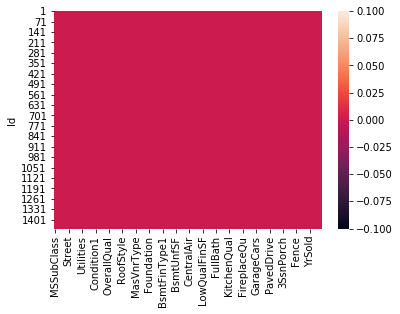

In [12]:
d.columns[d.isnull().any()]
sns.heatmap(d.isnull())

In [13]:
#Encoding the variables

In [14]:
obj_df = d.select_dtypes(include=['object']).copy()
obj_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,0,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
4,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
5,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal


In [15]:
int_df = d.select_dtypes(include=['int64']).copy()
float_df=d.select_dtypes(include=['float64']).copy()
df_int_float = pd.concat([float_df,int_df], axis=1)

In [16]:
df_int_float

,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,196.0,2003.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,80.0,0.0,1976.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
3,68.0,162.0,2001.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
4,60.0,0.0,1998.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
5,84.0,350.0,2000.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,0.0,1999.0,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1457,85.0,119.0,1978.0,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1458,66.0,0.0,1941.0,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500


In [17]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [18]:
le = preprocessing.LabelEncoder()
obj_df_trf=obj_df.astype(str).apply(le.fit_transform)

In [19]:
d1 = pd.concat([df_int_float,obj_df_trf], axis=1)
d1

,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,196.0,2003.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,0,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,2,4,2,3,4,4,3,6,1,0,1,4,2,6,0,2,2,5,5,2,0,0,0,8,4
2,80.0,0.0,1976.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,0,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,3,4,2,1,6,1,0,1,4,3,6,5,2,2,5,5,2,0,0,0,8,4
3,68.0,162.0,2001.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,0,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,2,4,2,3,4,3,3,6,1,0,1,4,2,6,5,2,2,5,5,2,0,0,0,8,4
4,60.0,0.0,1998.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,0,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,2,4,1,6,1,2,1,4,2,6,3,6,3,5,5,2,0,0,0,8,0
5,84.0,350.0,2000.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,0,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,2,4,2,3,4,1,3,6,1,0,1,4,2,6,5,2,2,5,5,2,0,0,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,0.0,1999.0,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000,3,1,0,3,3,0,4,0,8,2,2,0,5,1,1,12,13,3,3,4,2,3,4,4,6,6,1,0,1,4,3,6,5,2,2,5,5,2,0,0,0,8,4
1457,85.0,119.0,1978.0,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000,3,1,0,3,3,0,4,0,14,2,2,0,2,1,1,9,10,4,3,4,1,3,4,4,1,5,1,4,1,4,3,2,5,2,3,5,5,2,0,3,0,8,4
1458,66.0,0.0,1941.0,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500,3,1,0,3,3,0,4,0,6,2,2,0,5,1,1,5,5,3,0,2,4,4,2,4,3,6,1,0,1,4,2,6,3,2,2,5,5,2,0,1,3,8,4


In [20]:
#Creating dummy variables

In [22]:
#d2 = pd.get_dummies(d1, prefix='Rank', prefix_sep='.', columns=['rank'])

In [25]:
d1.columns


Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
      

In [29]:
d2 = pd.get_dummies(d)

In [91]:
d2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_0,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_0,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_0,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_0,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_0,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,Garage

In [113]:
#data visualisation 

In [ ]:
#sns.pairplot(d1)

In [114]:
#Training test split 

In [42]:
X1 = d1[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']]
y1 = d1['SalePrice']

In [43]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=101)

In [44]:
X2 = d1[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']]
y2 = d1['SalePrice']

In [45]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=101)

In [46]:
#Linear regression 

In [47]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(lm1.intercept_)

800983.147022511


In [49]:
coeff_df = pd.DataFrame(lm1.coef_,X1.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MSSubClass,-104.390181
MSZoning,-1999.265884
LotFrontage,-11.573156
LotArea,0.271445
Street,24446.749173
LotShape,-1089.729291
LandContour,3114.997215
Utilities,-45303.380037
LotConfig,286.922083
LandSlope,8185.315433


In [65]:
predlinreg1 = lm1.predict(X1_test)

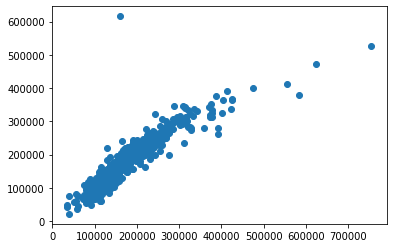

In [66]:
plt.scatter(y_test,predlinreg2)

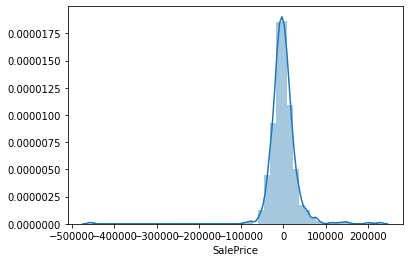

In [67]:
sns.distplot((y1_test-predlinreg1),bins=50)

In [68]:
from sklearn import metrics

In [69]:
print('MAE:', metrics.mean_absolute_error(y1_test, predlinreg1))
print('MSE:', metrics.mean_squared_error(y1_test, predlinreg1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predlinreg1)))

MAE: 19814.375103414124
MSE: 1177109012.5698395
RMSE: 34309.02232022707


In [70]:
lm1.score(X1_test, y1_test)

0.8140734042699045

In [31]:
#Linear Regression - d2

In [57]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print(lm2.intercept_)
coeff_df = pd.DataFrame(lm2.coef_,X2.columns,columns=['Coefficient'])
coeff_df

800983.147022511


,Coefficient
MSSubClass,-104.390181
MSZoning,-1999.265884
LotFrontage,-11.573156
LotArea,0.271445
Street,24446.749173
LotShape,-1089.729291
LandContour,3114.997215
Utilities,-45303.380037
LotConfig,286.922083
LandSlope,8185.315433


In [62]:
predlinreg2 = lm2.predict(X2_test)

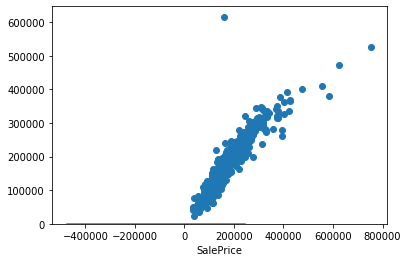

In [63]:
plt.scatter(y_test,predlinreg2)
sns.distplot((y1_test-predlinreg2),bins=50);

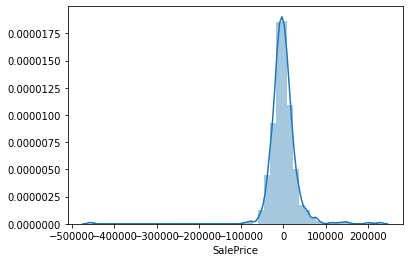

In [72]:
sns.distplot((y2_test-predlinreg2),bins=50)

In [71]:
print('MAE:', metrics.mean_absolute_error(y1_test, predlinreg2))
print('MSE:', metrics.mean_squared_error(y1_test, predlinreg2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predlinreg2)))

MAE: 19814.375103414124
MSE: 1177109012.5698395
RMSE: 34309.02232022707


In [73]:
lm1.score(X1_test, y1_test)

0.8140734042699045

In [127]:
#Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel1 = LogisticRegression()
logmodel1.fit(X1_train,y1_train)

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predlogreg1 = logmodel1.predict(X1_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,predlogreg1))

              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       35311       0.00      0.00      0.00         1
       39300       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       79900       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         3
       80500       0.00      0.00      0.00         1
       81000       0.00    

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, predlogreg1)
print(confusion_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
logmodel2 = LogisticRegression()
logmodel2.fit(X2_train,y2_train)

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
predlogreg2 = logmodel2.predict(X2_test)

In [86]:
print(classification_report(y2_test,predlogreg2))

              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       35311       0.00      0.00      0.00         1
       39300       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       79900       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         3
       80500       0.00      0.00      0.00         1
       81000       0.00    

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_test, predlogreg2)
print(confusion_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [133]:
#KNN

In [121]:
d1['Target Class'] = d1['SalePrice'] // 100000 + 1
d1['Target Class'].value_counts()

2    911
3    320
1    114
4     87
5     19
6      5
8      2
7      2
Name: Target Class, dtype: int64

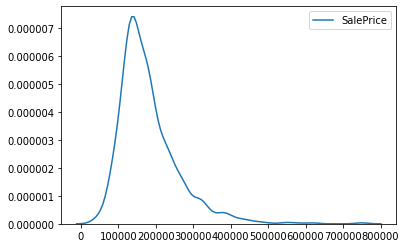

In [122]:
sns.kdeplot(d1['SalePrice'])

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

In [125]:
scaler.fit(d1.drop('Target Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
scaled_features = scaler.transform(d1.drop('Target Class',axis=1))

In [127]:
df_feat = pd.DataFrame(scaled_features,columns=d1.columns[:-1])
df_feat.head()

,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.212877,0.514104,0.296026,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.045532,0.064238,-0.243025,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,-0.491516,-0.125797,0.743092,0.751626,-1.153263,-0.777976,0.364207,0.835599,-0.179115,0.321530,0.658148,-0.336488,0.339853,-0.123046,-0.884658,0.263813,0.302403,-0.409369,0.255978,-0.966583,-0.580510,-0.066689,0.321389,0.302084,0.289745,-0.064673,-0.45403,-0.193669,0.313867,0.208502
1,0.645747,-0.570750,0.236495,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.045532,0.064238,-0.243025,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.491516,-0.125797,-0.508251,-0.661060,0.392893,0.663451,0.364207,-0.549162,-0.179115,0.321530,-0.947360,-1.391854,0.339853,-0.123046,-0.884658,0.263813,0.302403,0.795629,0.255978,1.487697,-0.580510,-0.066689,0.321389,0.302084,0.289745,-0.064673,-0.45403,-0.193669,0.313867,0.208502
2,0.299451,0.325915,0.291616,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,-0.045532,0.064238,-0.243025,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,-0.491516,-0.125797,0.743092,0.751626,-1.153263,-0.777976,0.364207,0.835599,-0.179115,0.321530,-0.144606,-0.336488,0.339853,-0.123046,-0.884658,0.263813,0.302403,-0.409369,0.255978,1.487697,-0.580510,-0.066689,0.321389,0.302084,0.289745,-0.064673,-0.45403,-0.193669,0.313867,0.208502
3,0.068587,-0.570750,0.285002,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.045532,0.064238,-0.243025,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,-0.491516,-0.125797,1.055928,1.316701,0.392893,0.663451,0.364207,-1.933923,0.822829,-1.940802,0.658148,-1.391854,0.339853,-0.123046,0.265476,0.263813,0.302403,-0.409369,0.255978,0.505985,1.535705,1.003266,0.321389,0.302084,0.289745,-0.064673,-0.45403,-0.193669,0.313867,-3.426284
4,0.761179,1.366489,0.289412,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288

In [128]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,d1['Target Class'],test_size=0.40)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [130]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

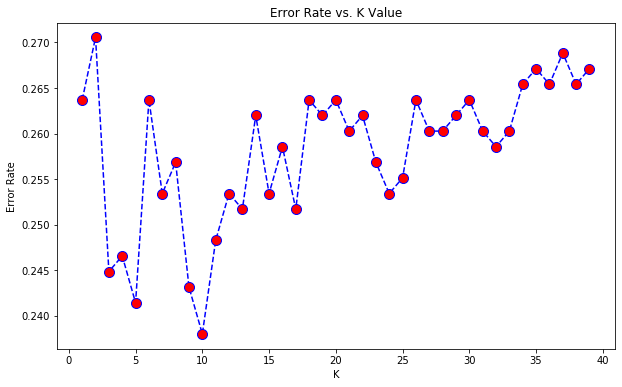

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [132]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
predknn = knn.predict(X_test)

print(confusion_matrix(y_test,predknn))

[[ 10  43   0   0   0   0   0]
 [  2 344   9   1   0   0   0]
 [  0  60  67   0   0   0   0]
 [  0   1  24  12   0   0   0]
 [  0   0   1   6   0   0   0]
 [  0   0   0   3   0   0   0]
 [  0   0   0   1   0   0   0]]


In [133]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           1       0.83      0.19      0.31        53
           2       0.77      0.97      0.86       356
           3       0.66      0.53      0.59       127
           4       0.52      0.32      0.40        37
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.74       584
   macro avg       0.40      0.29      0.31       584
weighted avg       0.72      0.74      0.70       584



C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
#Decision trees

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
dtree = DecisionTreeClassifier()

In [184]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [185]:
preddtree = dtree.predict(X_test)

In [186]:
print(classification_report(y_test,preddtree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      0.99      1.00       380
           3       0.98      0.99      0.99       120
           4       0.97      1.00      0.99        33
           5       1.00      1.00      1.00         9
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.99       584
   macro avg       0.70      0.75      0.72       584
weighted avg       0.99      0.99      0.99       584



C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
print(confusion_matrix(y_test,preddtree))

[[ 38   0   0   0   0   0   0   0]
 [  0 378   2   0   0   0   0   0]
 [  0   0 119   1   0   0   0   0]
 [  0   0   0  33   0   0   0   0]
 [  0   0   0   0   9   0   0   0]
 [  0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   1   0]]


In [191]:
#Random forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
predrfc = rfc.predict(X_test)

In [190]:
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[ 37   1   0   0   0   0   0   0]
 [  1 377   2   0   0   0   0   0]
 [  0   2 117   1   0   0   0   0]
 [  0   0  14  19   0   0   0   0]
 [  0   0   1   8   0   0   0   0]
 [  0   0   0   1   1   0   0   0]
 [  0   0   0   0   0   1   0   0]
 [  0   0   0   1   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        38
           2       0.99      0.99      0.99       380
           3       0.87      0.97      0.92       120
           4       0.63      0.58      0.60        33
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.94       584
   macro avg       0.43      0.44      0.44       584
weighted avg       0.92      0.94      0.93       584



C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
#Support Vector Machines

In [193]:
from sklearn.svm import SVC

In [195]:
model = SVC()

In [196]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [197]:
predsvm = model.predict(X_test)
print(confusion_matrix(y_test,predsvm))
print(classification_report(y_test,predsvm))

[[ 23  15   0   0   0   0   0   0]
 [  4 363  13   0   0   0   0   0]
 [  0  24  90   6   0   0   0   0]
 [  0   1  14  18   0   0   0   0]
 [  0   0   1   8   0   0   0   0]
 [  0   0   0   2   0   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   1   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.85      0.61      0.71        38
           2       0.90      0.96      0.93       380
           3       0.76      0.75      0.76       120
           4       0.51      0.55      0.53        33
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.85       584
   macro avg       0.38      0.36      0.36       584
weighted avg       0.83      0.85      0.83       584



C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [199]:
from sklearn.model_selection import GridSearchCV

In [201]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [202]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.608, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.608, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.829, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.835, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.886, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.851, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.891, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.829, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.773, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.840, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.886, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.886, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   11.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [203]:
grid.best_params_
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [204]:
predgrid = grid.predict(X_test)
print(confusion_matrix(y_test,predgrid))
print(classification_report(y_test,predgrid))

[[ 30   8   0   0   0   0   0   0]
 [ 10 356  13   0   1   0   0   0]
 [  0  15  97   8   0   0   0   0]
 [  0   0   9  23   1   0   0   0]
 [  0   0   0   7   2   0   0   0]
 [  0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   1   0   0]
 [  0   0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           1       0.75      0.79      0.77        38
           2       0.94      0.94      0.94       380
           3       0.82      0.81      0.81       120
           4       0.61      0.70      0.65        33
           5       0.29      0.22      0.25         9
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.87       584
   macro avg       0.42      0.43      0.43       584
weighted avg       0.87      0.87      0.87       584



C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
